In [1]:
# ANSWER 1
import necessary libraries
import pandas as pd

In [2]:
#importing dataset from address
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
#mean age per occupation
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
#maximum and minimum ages
users.groupby('occupation').age.agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [5]:
#combination of occupation and gender 
users.groupby(['occupation','gender']).mean('age')
gCounter = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
print(gCounter)

                      gender
occupation    gender        
administrator F           36
              M           43
artist        F           13
              M           15
doctor        M            7
educator      F           26
              M           69
engineer      F            2
              M           65
entertainment F            2
              M           16
executive     F            3
              M           29
healthcare    F           11
              M            5
homemaker     F            6
              M            1
lawyer        F            2
              M           10
librarian     F           29
              M           22
marketing     F           10
              M           16
none          F            4
              M            5
other         F           36
              M           69
programmer    F            6
              M           60
retired       F            1
              M           13
salesman      F            3
              

In [7]:
#percentage of women and men
gByCount = users.groupby(['occupation']).count()
gOccupCount = (gCounter.div(gByCount, level = "occupation") * 100)
gOccupCount.loc[:, 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

In [8]:
#ANSWER 2
importing libraries
import pandas as pd
import numpy as np

In [9]:
# import dataset from address
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [10]:
#goal coloumn
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [11]:
#team participated
euro12.Team.nunique()

16

In [12]:

euro12.shape[1]

35

In [13]:
#view Team, Yellow card and red card in discippline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [15]:
#sorting by red cards followed by yellow cards
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], inplace = True)
discipline

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26244\4264773076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discipline.sort_values(by=['Red Cards', 'Yellow Cards'], inplace = True)


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [16]:
#Mean of yellow cards given per team
discipline['Yellow Cards'].sum()/len(discipline['Yellow Cards'])

7.4375

In [17]:
#teams that scored more than 6
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [18]:
#start with G( I have done it seprately from above code)
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [19]:
#select first 7 coloumn 
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [20]:
#all coloumns except last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [1]:
#ANSWER 3
importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#creating three different series
series1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
series2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
series3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(series1, series2, series3)

0     3
1     3
2     1
3     2
4     1
     ..
95    2
96    3
97    2
98    1
99    1
Length: 100, dtype: int32 0     2
1     1
2     1
3     1
4     2
     ..
95    2
96    2
97    1
98    1
99    3
Length: 100, dtype: int32 0     18071
1     28302
2     11809
3     16802
4     15646
      ...  
95    21896
96    19117
97    11431
98    28901
99    29516
Length: 100, dtype: int32


In [3]:
#joining all series
housing = pd.concat([series1, series2, series3], axis=1)
housing.head()

,0,1,2
0,3,2,18071
1,3,1,28302
2,1,1,11809
3,2,1,16802
4,1,2,15646


In [4]:
#changing the names of coloumn
housing.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housing.head()

,bedrs,bathrs,price_sqr_meter
0,3,2,18071
1,3,1,28302
2,1,1,11809
3,2,1,16802
4,1,2,15646


In [5]:
#concatination of values in bigcoloumn
bigcolumn = pd.concat([series1, series2, series3], axis=0)

# we need to transform a series to a DataFrame
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,3
1,3
2,1
3,2
4,1
...,...
95,21896
96,19117
97,11431
98,28901


In [6]:
#lenght of dataframe
len(bigcolumn)

300

In [7]:
#reindex the dataframe
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,3
1,3
2,1
3,2
4,1
...,...
295,21896
296,19117
297,11431
298,28901


In [63]:
ANSWER 6
#importing libraries
import pandas as pd

In [64]:
#fetchind data
usamarriagedivorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [65]:
#print the usamarriagedivorce
print(usamarriagedivorce) 

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
0    1867   357000.0   10000.0    36970000                 9.7   
1    1868   345000.0   10000.0    37885000                 9.1   
2    1869   348000.0   11000.0    38870000                 9.0   
3    1870   352000.0   11000.0    39905000                 8.8   
4    1871   359000.0   12000.0    41010000                 8.8   
..    ...        ...       ...         ...                 ...   
140  2007  2197000.0  856000.0   301696000                 7.3   
141  2008  2157000.0  844000.0   304543000                 7.1   
142  2009  2080000.0  840000.0   307240000                 6.8   
143  2010  2096000.0  872000.0   309776000                 6.8   
144  2011  2118000.0  877000.0   312034000                 6.8   

     Divorces_per_1000  
0                  0.3  
1                  0.3  
2                  0.3  
3                  0.3  
4                  0.3  
..                 ...  
140                2.8  
141    

In [66]:
#year command
year = usamarriagedivorce['Year'].values

In [67]:
#print 
print(year)

[1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880
 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894
 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011]


In [68]:
#marriages in usa
marriagescapita = usamarriagedivorce['Marriages_per_1000'].values

In [69]:
#print marriages in usa
print(marriagescapita)

[ 9.7  9.1  9.   8.8  8.8  9.   8.9  8.7  9.   8.7  8.7  8.8  8.9  9.
  9.   9.2  9.2  8.7  8.9  9.2  8.6  8.8  9.1  9.   9.2  9.1  8.9  8.5
  8.8  8.9  8.9  8.8  9.   9.3  9.6  9.8 10.1  9.9 10.  10.5 10.8  9.7
  9.9 10.3 10.2 10.5 10.5 10.3 10.  10.6 11.1  9.6 10.9 12.  10.7 10.3
 11.  10.4 10.3 10.2 10.1  9.8 10.1  9.1  8.5  7.9  8.7 10.3 10.4 10.7
 11.3 10.2 10.7 12.1 12.7 13.1 11.5 10.5 11.5 16.2 13.8 12.4 10.6 11.
 10.3  9.8  9.7  9.2  9.3  9.4  8.9  8.3  8.4  8.4  8.4  8.5  8.7  9.
  9.3  9.4  9.7 10.3 10.6 10.7 10.5 10.9 10.8 10.5 10.   9.9  9.9 10.3
 10.4 10.6 10.6  nan  nan 10.5 10.1 10.   9.9  9.7  9.7  9.8  9.4  9.3
  9.   9.1  nan  nan  8.7  8.1  8.4  8.2  8.2  8.   7.7  7.8  7.6  7.3
  7.3  7.1  6.8  6.8  6.8]


In [70]:
#divorces in usa
divorcescapita = usamarriagedivorce['Divorces_per_1000'].values

In [71]:
#print divorces in usa
print(divorcescapita)

[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.5 0.5 0.5 0.5 0.6 0.6 0.5 0.6 0.6 0.6 0.6 0.7 0.7 0.7 0.8 0.8
 0.8 0.8 0.8 0.8 0.9 0.9 0.9 0.9 0.9 1.  0.9 1.  1.  1.1 1.2 1.1 1.4 1.6
 1.5 1.4 1.5 1.5 1.5 1.6 1.6 1.7 1.7 1.6 1.5 1.3 1.3 1.6 1.7 1.8 1.9 1.9
 1.9 2.  2.2 2.4 2.6 2.9 3.5 4.3 3.4 2.8 2.7 2.5 2.5 2.5 2.4 2.3 2.3 2.3
 2.2 2.1 2.2 2.2 2.3 2.2 2.3 2.3 2.5 2.5 2.6 2.9 3.2 3.5 3.7 4.  4.3 4.6
 4.8 5.  5.  5.1 5.3 5.2 5.3 nan nan 5.  5.  4.9 4.8 4.7 4.7 4.7 4.7 4.8
 4.6 4.6 nan nan 4.3 4.1 4.1 3.3 3.3 3.3 3.2 3.  2.9 2.9 2.8 2.8 2.7 2.8
 2.8]


In [72]:
#importing libraries
import matplotlib.pyplot as mp

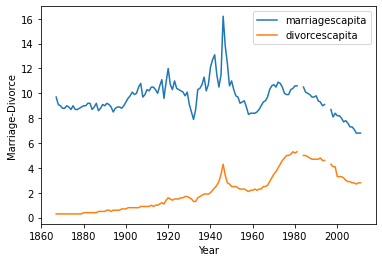

In [73]:
#show the label and legend
mp.figure()
mp.plot(year, marriagescapita,label='marriagescapita')
mp.plot(year, divorcescapita,label='divorcescapita')
mp.xlabel("Year")
mp.ylabel("Marriage-Divorce")
mp.legend()

In [3]:
#ANSWER 7
importing necessary libraries
import pandas as pd

SyntaxError: invalid syntax (622512659.py, line 2)

In [4]:
usamarriagedivorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')

In [5]:
print(usamarriagedivorce)

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
0    1867   357000.0   10000.0    36970000                 9.7   
1    1868   345000.0   10000.0    37885000                 9.1   
2    1869   348000.0   11000.0    38870000                 9.0   
3    1870   352000.0   11000.0    39905000                 8.8   
4    1871   359000.0   12000.0    41010000                 8.8   
..    ...        ...       ...         ...                 ...   
140  2007  2197000.0  856000.0   301696000                 7.3   
141  2008  2157000.0  844000.0   304543000                 7.1   
142  2009  2080000.0  840000.0   307240000                 6.8   
143  2010  2096000.0  872000.0   309776000                 6.8   
144  2011  2118000.0  877000.0   312034000                 6.8   

     Divorces_per_1000  
0                  0.3  
1                  0.3  
2                  0.3  
3                  0.3  
4                  0.3  
..                 ...  
140                2.8  
141    

In [6]:
usamarriagedivorce = usamarriagedivorce[
    usamarriagedivorce['Year'].apply(lambda x: x in [1900, 1950, 2000])]

In [7]:
print(usamarriagedivorce)

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
33   1900   709000.0   56000.0    76094000                 9.3   
83   1950  1667000.0  385000.0   151684000                11.0   
133  2000  2315000.0  944000.0   282398000                 8.2   

     Divorces_per_1000  
33                 0.7  
83                 2.5  
133                3.3  


In [14]:
year = usamarriagedivorce['Year'].values

In [15]:
print(year)

[1900 1950 2000]


In [16]:
marriagescapita = usamarriagedivorce['Marriages_per_1000'].values

In [37]:
print(marriagescapita)

[ 9.3 11.   8.2]


In [38]:
divorcescapita =usamarriagedivorce['Divorces_per_1000'].values

In [39]:
print(divorcescapita)

[0.7 2.5 3.3]


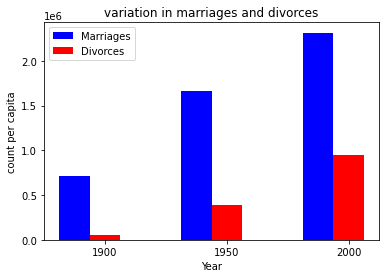

In [40]:
#vertical bar chart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

marriage_capita = [709000, 1667000, 2315000]
divorce_capita = [56000, 385000, 944000]

X = np.arange(len(marriage))
plt.bar(X, marriage, color = 'blue', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'red', width = 0.25)
plt.legend(['Marriages', 'Divorces'])
plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])
plt.title("variation in marriages and divorces")
plt.xlabel('Year')
plt.ylabel('count per capita')
plt.show()

In [25]:
#answer 8
#importing necessary libraries
import pandas as pd

In [26]:
actorkilledinhollywood = pd.read_csv('actor_kill_counts.csv')

In [27]:
print(actorkilledinhollywood)

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239
5                 Jet Li    201
6           Nicolas Cage    204
7     Sylvester Stallone    267
8    Tomisaburo Wakayama    226
9          Wesley Snipes    193


In [28]:
namesofactor = actorkilledinhollywood['Actor'].values

In [33]:
print(namesofactor )

['Arnold Schwarzenegger' 'Chow Yun-Fat' 'Clint Eastwood' 'Clive Owen'
 'Dolph Lundgren' 'Jet Li' 'Nicolas Cage' 'Sylvester Stallone'
 'Tomisaburo Wakayama' 'Wesley Snipes']


In [34]:
countsofkilledactors = actorkilledinhollywood['Count'].values

In [35]:
print(countsofkilledactors)

[369 295 207 194 239 201 204 267 226 193]


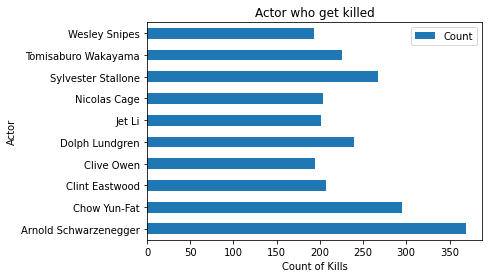

In [36]:
#horizontal bar graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

killfilename = 'actor_kill_counts.csv'

killdata = pd.read_csv(filenamekill)

datakill.plot.barh(x='Actor', y='Count')

plt.title("Actor who get killed")
plt.ylabel('Actor')
plt.xlabel('Count of Kills')
plt.show()

In [ ]:
#refrences: (took guidance at some point from peers)
github.com/guipsamora/pandas_exercises/blob/master/05_Merge/Housing%20Market/Exercises_with_solutions.ipynb
